# Plotting in python: Matplotlib

Previously, we called plt.plot() to draw the points. We were creating single-panel plots.  Like in Matlab (subplot) we can put different plot panels into a single figure.  This is also helpful to share things like axis formatting between plots.  We will now call the plot function in the respective axes (ax1 and ax2 in below code) instead of plt.  Notice in below code, calls are made to ax1.plot() and ax2.plot() instead of calling plt.plot() twice:

(0, 12)

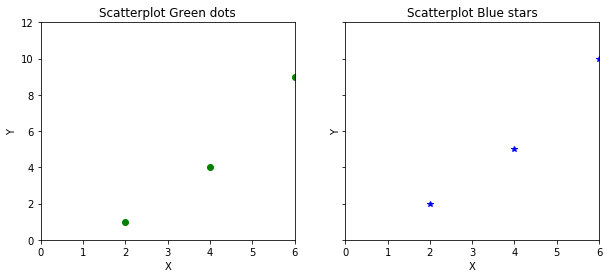

In [1]:
# import the matplotlib package
from matplotlib import pyplot as plt

# set display in-line
%matplotlib inline

# define variables
x = [ 2, 4, 6, 8, 10 ]
y = [ 1, 4, 9, 16, 25 ]
z = [ 2, 5, 10, 17, 26 ]

# now, we first create our figure to have 1 row and 2 columns (i.e., two panels side-by-side)
#  Notes: we have two "returns" from this call, fig and (ax1,ax2); we also specify that we
#  want to share the y-axis
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

# next we make out plots
ax1.plot(x,y, 'go')  # green dots
ax2.plot(x,z, 'b*')  # blue stars
ax1.set_title('Scatterplot Green dots')
ax2.set_title('Scatterplot Blue stars')
ax1.set_xlabel('X');  ax2.set_xlabel('X')  # x label
ax1.set_ylabel('Y');  ax2.set_ylabel('Y')  # y label
ax1.set_xlim(0, 6) ;  ax2.set_xlim(0, 6)   # x axis limits
ax1.set_ylim(0, 12);  ax2.set_ylim(0, 12)  # y axis limits

Setting sharey=True in plt.subplots() shares the Y axis between the two subplots.

Note that the ax1 and ax2 objects, like plt, has equivalent set_title, set_xlabel and set_ylabel functions. In fact, the plt.title() actually calls the current axes set_title() to do the job.

<ul>
  <li> plt.xlabel() → ax.set_xlabel()
  <li> plt.ylabel() → ax.set_ylabel()
  <li> plt.xlim() → ax.set_xlim()
  <li> plt.ylim() → ax.set_ylim()
  <li> plt.title() → ax.set_title()
</ul>

Alternately, you can set multiple things in one go using the ax.set():

<pre>
ax1.set(title='Scatterplot Green dots', xlabel='X', ylabel='Y', xlim=(0,6), ylim=(0,12))
ax2.set(title='Scatterplot Blue stars', xlabel='X', ylabel='Y', xlim=(0,6), ylim=(0,12))
</pre>

Just to complete the example we can now remake the sample multi-panel plot using Matlab syntax rather than object oriented.  To do this we need to manually create one subplot at a time (using plt.subplot() or plt.add_subplot()) and immediately call plt.plot() or plt.{anything} to modify that specific subplot (axes). Whatever method you call using plt will be drawn in the current axes.

Always remember: plt.plot() or plt.{anything} will always act on the plot in the current axes, whereas, ax.{anything} will modify the plot inside that specific ax.  In the following example we will make a four-panel figure using the object oriented approach.  The plot will be of random numbers, and to generate these we will use the numpy package.  Note in this example we will also use dictionaries to store plot variables.

Text(0.5, 0.98, 'Four Subplots in One Figure')

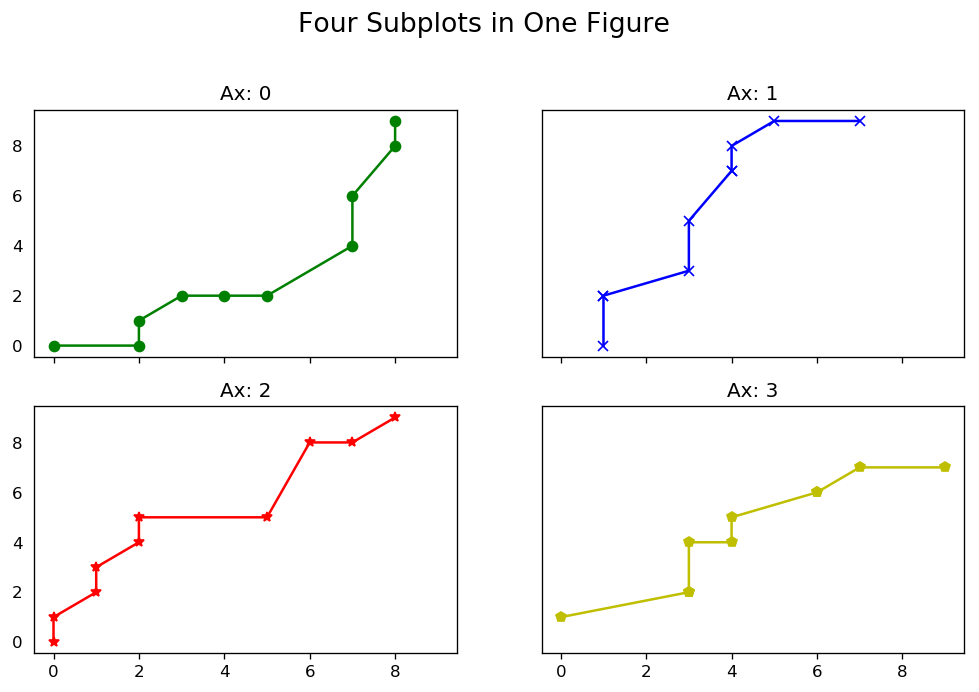

In [2]:
# import packages, numpy for numerics, random for random numbers, and matplotlib for plotting
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import seed, randint
seed(100)

%matplotlib inline

# Create Figure and Subplots
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True, sharey=True, dpi=120)

# Define the colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'}
markers = {0:'o', 1:'x', 2:'*', 3:'p'}

# Plot each axes
for i, ax in enumerate(axes.ravel()):
    ax.plot(sorted(randint(0,10,10)), sorted(randint(0,10,10)), marker=markers[i], color=colors[i])  
    ax.set_title('Ax: ' + str(i))
    ax.yaxis.set_ticks_position('none')

plt.suptitle('Four Subplots in One Figure', verticalalignment='bottom', fontsize=16)    

Note that we can turn off the y-axis tick marks with 

ax.yaxis.set_ticks_position('none') 

to turn off the Y-axis ticks. This is another advantage of the object-oriented interface. You can actually get a reference to any specific element of the plot and use its methods to manipulate it.

The plt.suptitle() added a main title at figure level title. plt.title() would have done the same for the current subplot (axes).  The verticalalignment='bottom' parameter denotes the hinge point should be at the bottom of the title text, so that the main title is pushed slightly upwards.

The next step will be to modify the figure properties such as labels and tick marks.  There are 3 basic things you will probably ever need in matplotlib when it comes to manipulating axis ticks:

<ol>
  <li> How to control the position and tick labels? (using plt.xticks() or ax.setxticks() and ax.setxticklabels())
  <li> How to control which axis’s ticks (top/bottom/left/right) should be displayed (using plt.tick_params())
  <li> Functional formatting of tick labels
</ol>

If you are using ax syntax, you can use ax.set_xticks() and ax.set_xticklabels() to set the positions and label texts respectively. If you are using the plt syntax, you can set both the positions as well as the label text in one call using the plt.xticks().  Actually, if you look at the code of plt.xticks() method (by typing plt.xticks in jupyter notebook), it calls ax.set_xticks() and ax.set_xticklabels() to do the job. plt.xticks takes the ticks and labels as required parameters but you can also adjust the label’s fontsize, rotation, ‘horizontalalignment’ and ‘verticalalignment’ of the hinge points on the labels:

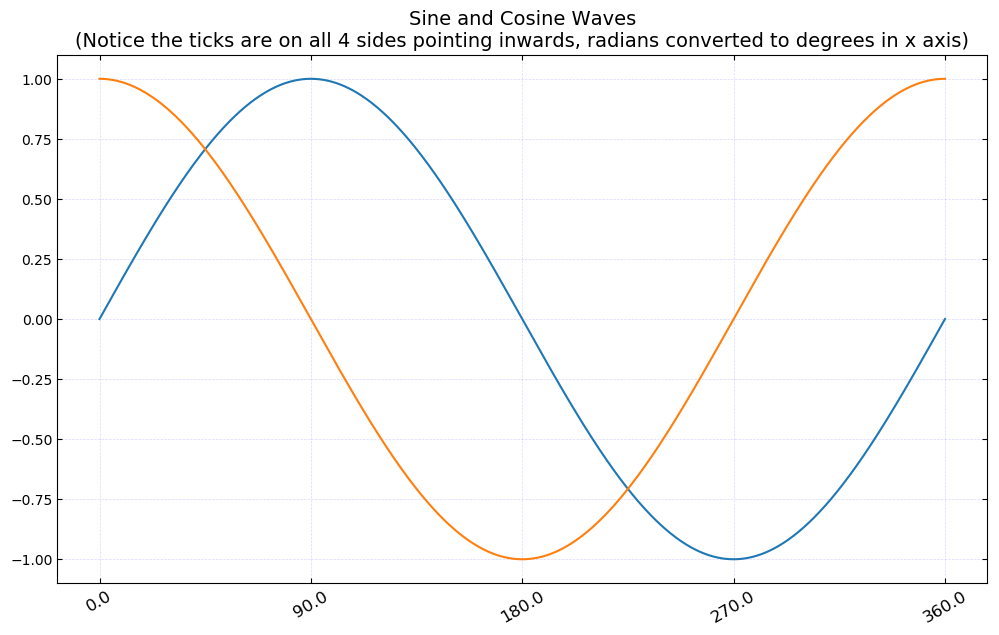

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

def rad_to_degrees(x,pos):
    return round(x*57.2985,2)

plt.figure(figsize=(12,7), dpi=100)
X = np.linspace(0,2*np.pi,1000)
plt.plot(X,np.sin(X))
plt.plot(X,np.cos(X))

# 1. Adjust x axis Ticks
plt.xticks(ticks=np.arange(0, 440/57.2985, 90/57.2985), fontsize=12, rotation=30, ha='center', va='top')  # 1 radian = 57.2985 degrees

# 2. Tick Parameters
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='blue')

# 3. Format tick labels to convert radians to degrees
formatter = FuncFormatter(rad_to_degrees)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(linestyle='--', linewidth=0.5, alpha=0.15)
plt.title('Sine and Cosine Waves\n(Notice the ticks are on all 4 sides pointing inwards, radians converted to degrees in x axis)', fontsize=14)
plt.show()